**M501 - Manejo y conversión de energía solar térmica**
# Tutorial 2

Este es un tutorial para utilizar el módulo `ref_spectra` de la librería `empylib`

## Instrucciones de instalación
- La librería ```empylib``` esta disponible desde github ejecutando la siguiente sentencia en una celda de este notebook:
```python
!git clone https://github.com/PanxoPanza/empylib.git
```
Esto descargará una carpeta "empylib" con todos los módulos necesarios. **Ejecutar solo una vez para descar la carpeta** Posteriormente, no es necesario volver a ejecutar esta línea.

- La libería ```iadpython``` debe ser instalada desde pip, ejecutando el siguiente script en una celda de este notebook
```python
import sys
!{sys.executable} -m pip install iadpython
```
Esta instancia debe ser ejecutada solo una vez.

<h1>Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instrucciones-de-instalación" data-toc-modified-id="Instrucciones-de-instalación-1">Instrucciones de instalación</a></span></li><li><span><a href="#Distribución-de-Planck-(Bplanck)" data-toc-modified-id="Distribución-de-Planck-(Bplanck)-2">Distribución de Planck (<code>Bplanck</code>)</a></span></li><li><span><a href="#Irradiación-solar,-espectro-AM1.5-(AM15)" data-toc-modified-id="Irradiación-solar,-espectro-AM1.5-(AM15)-3">Irradiación solar, espectro AM1.5 (<code>AM15</code>)</a></span></li><li><span><a href="#Transmitancia-atmosférica-(T_atmosphere)" data-toc-modified-id="Transmitancia-atmosférica-(T_atmosphere)-4">Transmitancia atmosférica (<code>T_atmosphere</code>)</a></span></li></ul></div>

In [1]:
import empylib.ref_spectra as rf

## Distribución de Planck (`Bplanck`)
La función `Bplanck` permite determinar la radiancia espectral de un cuerpo negro.

Tal como indica la documentación, los valores de entrada son: 
- `lam` espectro de longitudes de onda en micrones
- `T` temperatura del cuerpo negro en Kelvin
- `unit` argumento opcional en caso que se necesite el espectro de radiancia en unidades de frecuencia (**no necesario para este curso**)

Como parámetro de salida, la función entregará la radiancia espectral

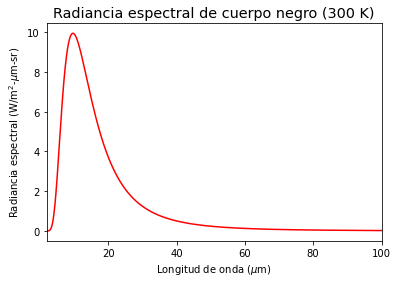

In [2]:
# -------------------------------------------------------------------
# librerías adicionales 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
# -------------------------------------------------------------------

import empylib.ref_spectra as rf

T = 300
lam = np.linspace(2.0,100,1000) # espectro de longitudes de onda (de 2 a 100 micrones)
Ibb = rf.Bplanck(lam,T)         # Temperatura del cuerpo negro

# Graficamos resultados
fig, ax = plt.subplots()
plt.rcParams['font.size'] = '12'
ax.plot(lam,Ibb,'-r')    # graficar absortancia

ax.set_xlabel('Longitud de onda ($\mu$m)')
ax.set_ylabel('Radiancia espectral (W/m$^2$-$\mu$m-sr)')
ax.set_title('Radiancia espectral de cuerpo negro (%i K)' % T)
ax.set_xlim(2,100)
plt.show()

Con esto podemos analizar la variación del poder de emisión espectral hemisférico del cuerpo negro, $\pi I_{\mathrm{bb},\lambda}$, en función de la temperatura

/mnt/c/Users/francisco.ramirez.c/OneDrive - Universidad Adolfo Ibanez/ComputerCodes/Python/custom_packages/empylib/ref_spectra/ref_spectra.py:161: RuntimeWarning: overflow encountered in exp
  Ibb = 2*h*c0**2./ll**5*1/(np.exp(h*c0/(ll*T*kB)) - 1)*1E-6


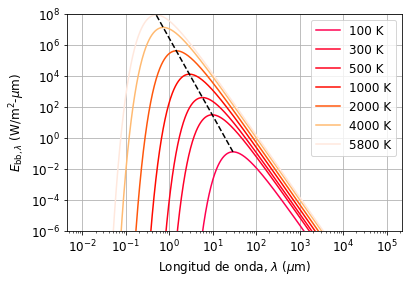

In [3]:
from empylib.ref_spectra import color_system as cs
cs = cs.hdtv

fig.set_size_inches(14, 5)
plt.rcParams['font.size'] = '12'

lam = np.logspace(-2,5,1000)       # espectro de longitudes de onda
T_list = np.array([100,300,500,    # lista de temperaturas
                   1000,2000,4000,
                   5800])

# creamos dos listas vacías para guardar el valor máximo de cada curva y la longitud de onda asociada
peak   = []            
lam_at = []

# iteramos respecto a la temperatura
for T in T_list:
    Ebb = np.pi*rf.Bplanck(lam, T)                         # poder de emisión hemisférico espectral del cuerpo negro
    html_rgb = cs.spec_to_rgb(Ebb, lam, out_fmt='html')    # color asociado a la curva
    plt.plot(lam,Ebb,label=('%i K' % T), color=html_rgb)   # graficamos el espectro usando el color anterior 
    peak.append(np.max(Ebb))                               # guardamos el máximo de la curva
    lam_at.append(lam[np.argmax(Ebb)])                     # guardamos la longitud de onda asociada al máximo

plt.plot(lam_at,peak,'--k') # graficamos la línea correspondiente a la ley de desplazamiento de Wien
plt.yscale('log')
plt.ylim(1E-6,1E8)
plt.xscale('log')
plt.grid()
plt.xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
plt.ylabel('$E_{\mathrm{bb},\lambda}$ (W/m$^2$-$\mu$m)')
plt.legend()
plt.show()

Además podemos comprobar la ley de Stefan-Boltzmann para el poder de emisión hemisférico total:

\begin{equation*}
\int_\mathrm{hemi}\int_0^\infty I_{\mathrm{bb},\lambda}(\lambda,T)~\cos\theta~d\lambda~d\Omega = \pi\int_0^\infty I_{\mathrm{bb},\lambda}(\lambda,T)~d\lambda = \sigma T^4
\end{equation*}

Para la integración ocupamos la regla del trapecio a travéz de la función `numpy.trapz` (también disponible en la librería `scipy.integrate` como `trapezoid` o `trapz`). [Más info acá](https://panxopanza.github.io/metodos_numericos_mec301/7-Integracion/7-Integracion.html#regla-del-trapecio-scipy-integrate-trapezoid)

In [4]:
T = 300
lam = np.linspace(2.0,100,100) # espectro de longitudes de onda (de 2 a 100 micrones)
Ibb = rf.Bplanck(lam,T)         # Temperatura del cuerpo negro

sigma = 5.6704E-8 # constante de Stefan-Boltzmann

E_int = np.pi*np.trapz(Ibb,lam) # poder de emisión integrando la distribución de Planck
E_sb = sigma*T**4               # poder de emisión por Steffan-Boltzmann

print('Poder de emisión de cuerpo negro (integral de dist. de Planck): %.3f W/m^2' % E_int)
print('Poder de emisión de cuerpo negro (Stefan-Boltzmann): %.3f W/m^2' % E_sb)

Poder de emisión de cuerpo negro (integral de dist. de Planck): 457.136 W/m^2
Poder de emisión de cuerpo negro (Stefan-Boltzmann): 459.302 W/m^2


> Notar que los valores no son exáctamente iguales. Esto porque $\lambda$ en la integración está acotado a $\lambda\in[2,100]$ $\mu$m. El valor mejora si aumentamos el espectro de integración. Por ejemplo, para $\lambda\in[2,10000]$ $\mu$m, el poder de emisión calculado a travéz de la interal es `459.300 W/m^2`.

## Irradiación solar, espectro AM1.5 (`AM15`)

La función `AM15` entrega el espectro global y directo del AM1.5 para un arreglo de longitudes de onda.

Como valor de entrada la función requiere el espectro de longitudes de onda `lam` en unidades de micrometros. El tipo de espectro (global o directo) se puede controlar mediante un segúndo argumento `spectra_type`, con `spectra_type='global'` para espectro directo, y `spectra_type='direct'` para espectro difuso. Por defecto `spectra_type='global'`

En el siguiente código graficaremos el espectro AM1.5 directo y global comparándolo con la radiación solar extraterrestre, $I_\mathrm{sun,out}$. Para este último, consideraremos la radiación de cuerpo negro mediante `Bplanck` escalada a partir de la constante solar.

\begin{equation*}
I_\mathrm{sun,out} = \frac{G_\mathrm{sun}}{\sigma T^4_\mathrm{sun}} \pi I_{\mathrm{bb},\lambda}(\lambda,T_\mathrm{sun})
\end{equation*}

donde $T_\mathrm{sun} = 5777$ K y $G_\mathrm{sun} = 1367$ W/m$^2$.

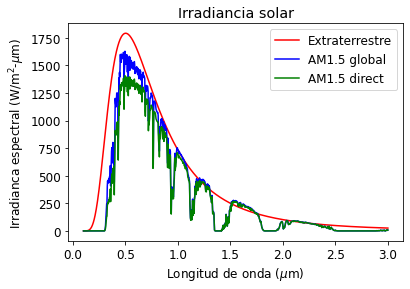

In [5]:
lam = np.linspace(0.1,3.0,1000)

sigma = 5.6704E-8 # constante de Stefan-Boltzmann
Tsun = 5777     # temperatura efectiva del sol (K)
Gsun = 1367      # constante solar (W/m^2)

Isun_global = rf.AM15(lam,spectra_type='global')
Isun_direct = rf.AM15(lam,spectra_type='direct')
Isun_out    = Gsun/(sigma*Tsun**4)*np.pi*rf.Bplanck(lam,Tsun)

# Graficamos resultados
fig, ax = plt.subplots()
plt.rcParams['font.size'] = '12'
ax.plot(lam,Isun_out   ,'-r',label ='Extraterrestre')
ax.plot(lam,Isun_global,'-b',label ='AM1.5 global')
ax.plot(lam,Isun_direct,'-g',label ='AM1.5 direct')

ax.set_xlabel('Longitud de onda ($\mu$m)')
ax.set_ylabel('Irradianca espectral (W/m$^2$-$\mu$m)')
ax.set_title('Irradiancia solar')
ax.legend()
plt.show()

## Transmitancia atmosférica (`T_atmosphere`)

Esta función permite determinar la transmitancia atmosférica a partir de un espectro de longitudes de onda. Como valor de entrada la función requiere el espectro de longitudes de onda `lam` en unidades de micrometros. 

En el siguiente ejemplo graficaremos la radiación de cuerpo negro con $T = 300$ K, el AM1.5 global y la transmitancia atmosférica.

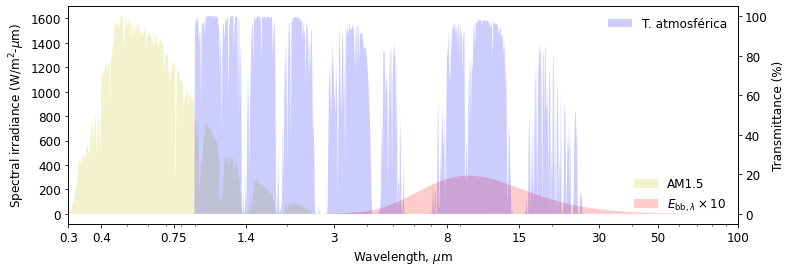

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter

lam = np.logspace(np.log10(0.3),np.log10(100),1000) # espectro de longitudes de onda

T_atm = rf.T_atmosphere(lam)
Isun = rf.AM15(lam)
Ibb = np.pi*rf.Bplanck(lam,300)

fig, ax = plt.subplots(figsize=(12,4))
ax.fill(lam,Isun,'-y',alpha=0.2,label='AM1.5')
ax.fill(lam,Ibb*10,'-r',alpha=0.2,label=r'$E_{\mathrm{bb},\lambda}\times 10$ ')
ax2=ax.twinx()
ax2.fill(lam,T_atm*100,'-b',alpha=0.2,label = 'T. atmosférica')

ax.set_xlabel('Wavelength, $\mu$m')
ax.set_ylabel('Spectral irradiance (W/m$^2$-$\mu$m)')
ax.set_xscale('log')
ax.set_xticks([0.3,0.4,0.75,1.4,3,8,15,30, 50, 100])
ax.set_xlim(0.3,100)
ax2.set_ylabel('Transmittance (%)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.16g}'.format(y)))
ax.legend(frameon=False,loc='lower right')
ax2.legend(frameon=False,loc='upper right')
plt.show()